tutorial Visualizing Neural Network Layer Activation (Tensorflow Tutorial)
 Arthur Juliani

#source : https://medium.com/@awjuliani/visualizing-neural-network-layer-activation-tensorflow-tutorial-d45f8bf7bbc4

In [1]:
import numpy as np 
import matplotlib as mp
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.slim as slim
from tensorflow.examples.tutorials.mnist import input_data
import math

/home/sachin/.virtualenvs/keras_tf/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 784],name="x-in")
true_y = tf.placeholder(tf.float32, [None, 10],name="y-in")
keep_prob = tf.placeholder("float")

x_image = tf.reshape(x,[-1,28,28,1])
hidden_1 = slim.conv2d(x_image,5,[5,5])
pool_1 = slim.max_pool2d(hidden_1,[2,2])
hidden_2 = slim.conv2d(pool_1,5,[5,5])
pool_2 = slim.max_pool2d(hidden_2,[2,2])
hidden_3 = slim.conv2d(pool_2,20,[5,5])
hidden_3 = slim.dropout(hidden_3,keep_prob)
out_y = slim.fully_connected(slim.flatten(hidden_3),10,activation_fn=tf.nn.softmax)

cross_entropy = -tf.reduce_sum(true_y*tf.log(out_y))
correct_prediction = tf.equal(tf.argmax(out_y,1), tf.argmax(true_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [4]:
batchSize = 50
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
for i in range(1001):
    batch = mnist.train.next_batch(batchSize)
    sess.run(train_step, feed_dict={x:batch[0],true_y:batch[1], keep_prob:0.5})
    if i % 100 == 0 and i != 0:
        trainAccuracy = sess.run(accuracy, feed_dict={x:batch[0],true_y:batch[1], keep_prob:1.0})
        print("step %d, training accuracy %g"%(i, trainAccuracy))

step 100, training accuracy 0.4
step 200, training accuracy 0.58
step 300, training accuracy 0.78
step 400, training accuracy 0.74
step 500, training accuracy 0.74
step 600, training accuracy 0.86
step 700, training accuracy 0.94
step 800, training accuracy 0.86
step 900, training accuracy 0.88
step 1000, training accuracy 0.92


In [5]:
testAccuracy = sess.run(accuracy, feed_dict={x:mnist.test.images,true_y:mnist.test.labels, keep_prob:1.0})
print("test accuracy %g"%(testAccuracy))

test accuracy 0.9003


In [6]:
def getActivations(layer,stimuli):
    units = sess.run(layer,feed_dict={x:np.reshape(stimuli,[1,784],order='F'),keep_prob:1.0})
    plotNNFilter(units)

In [7]:
def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

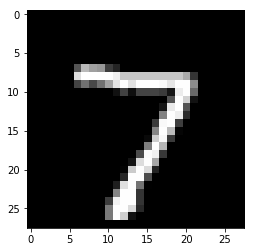

In [8]:
imageToUse = mnist.test.images[0]
plt.imshow(np.reshape(imageToUse,[28,28]), interpolation="nearest", cmap="gray")

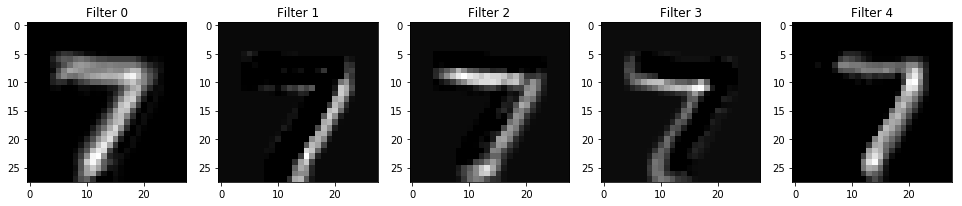

In [9]:
getActivations(hidden_1, imageToUse)

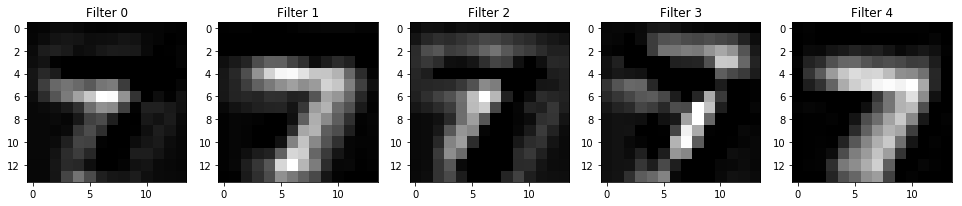

In [10]:
getActivations(hidden_2, imageToUse)

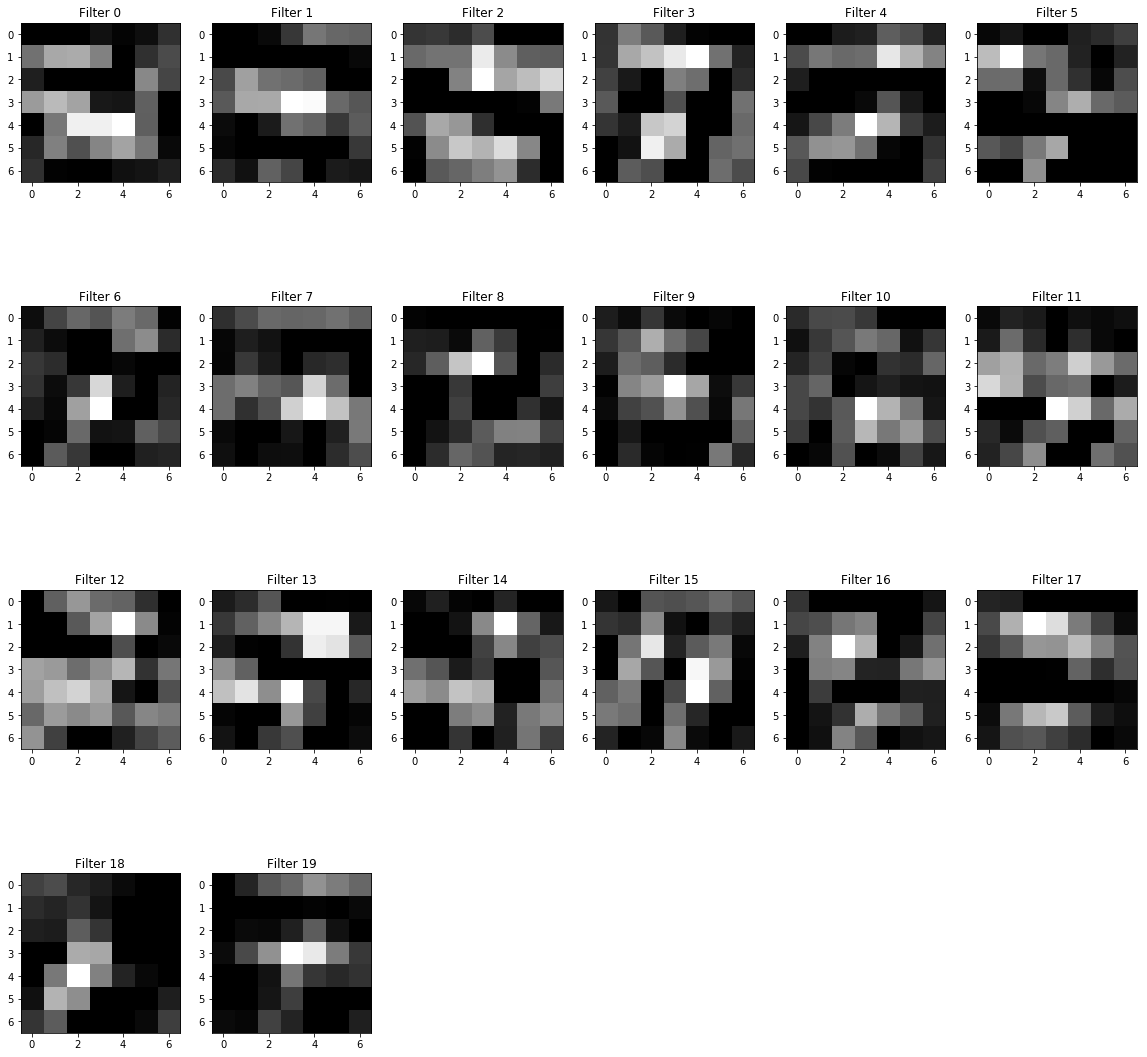

In [11]:
getActivations(hidden_3, imageToUse)

0
1
2
3
4
5
6
7
8
9


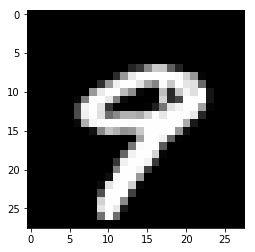

In [12]:
for i in range(10):
    print(i)
    imageToUse = mnist.test.images[i]
    plt.imshow(np.reshape(imageToUse,[28,28]), interpolation="nearest", cmap="gray")
 

<type 'int'>
0


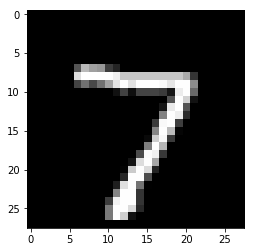

<type 'int'>
1


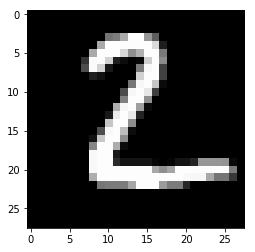

<type 'int'>
2


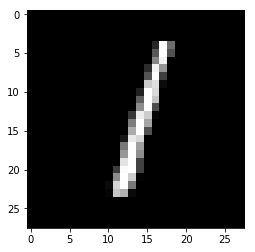

<type 'int'>
3


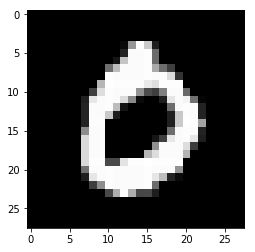

<type 'int'>
4


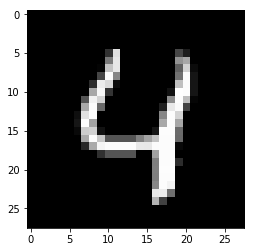

<type 'int'>
5


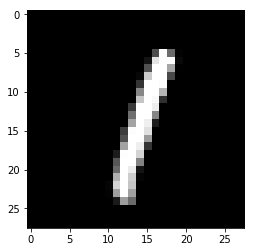

<type 'int'>
6


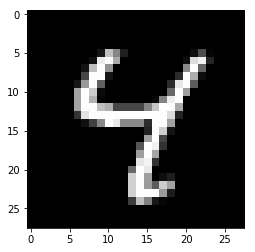

<type 'int'>
7


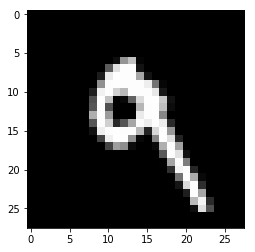

<type 'int'>
8


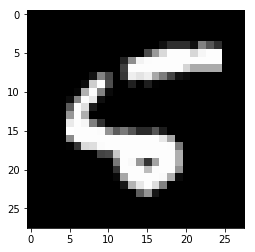

<type 'int'>
9


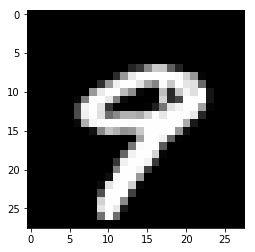

<type 'int'>
10


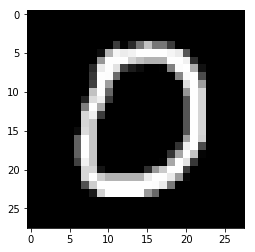

<type 'int'>
11


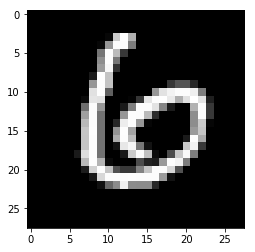

<type 'int'>
12


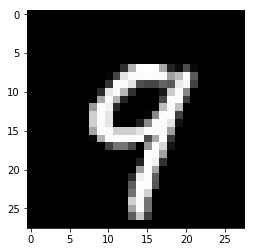

<type 'int'>
13


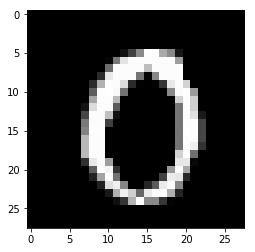

<type 'int'>
14


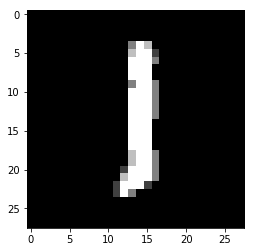

<type 'int'>
15


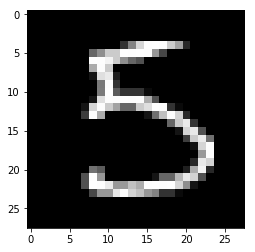

<type 'int'>
16


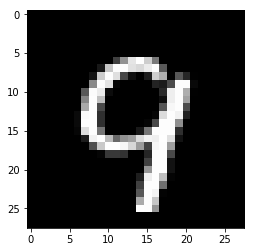

<type 'int'>
17


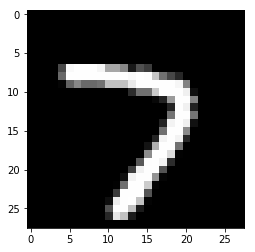

<type 'int'>
18


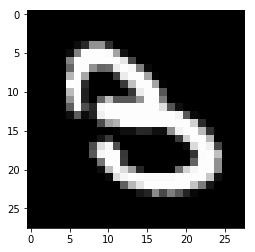

<type 'int'>
19


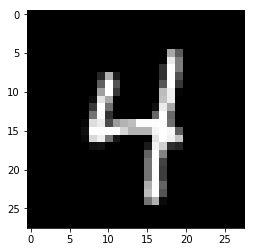

<type 'int'>
20


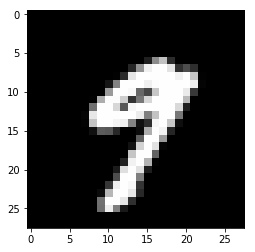

<type 'int'>
21


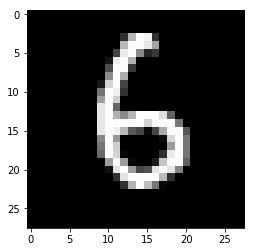

<type 'int'>
22


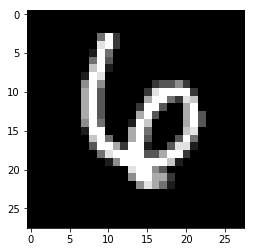

<type 'int'>
23


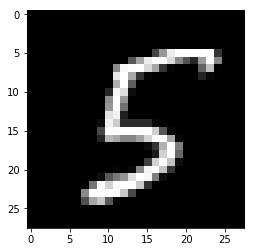

<type 'int'>
24


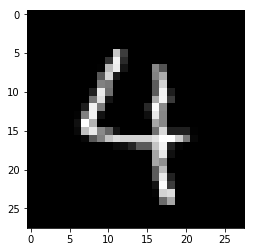

<type 'int'>
25


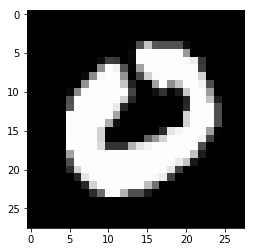

<type 'int'>
26


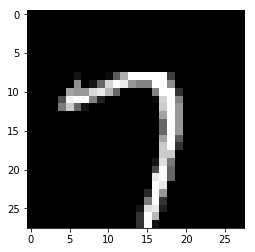

<type 'int'>
27


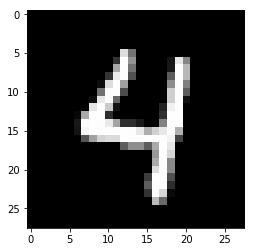

<type 'int'>
28


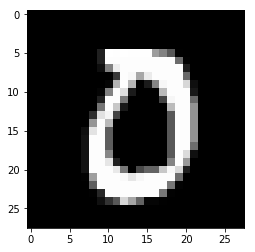

<type 'int'>
29


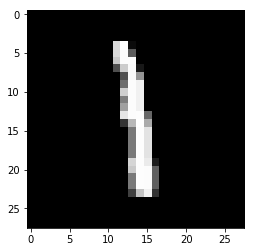

<type 'int'>
30


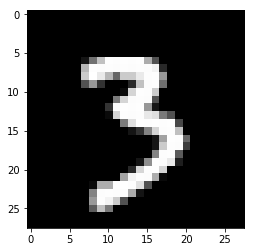

<type 'int'>
31


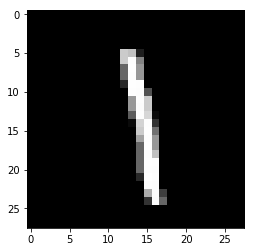

<type 'int'>
32


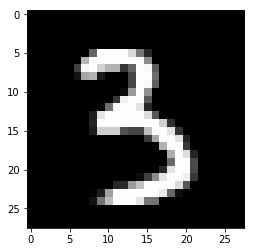

<type 'int'>
33


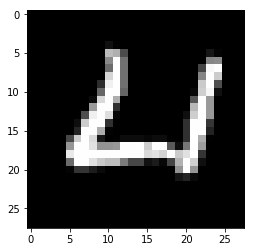

<type 'int'>
34


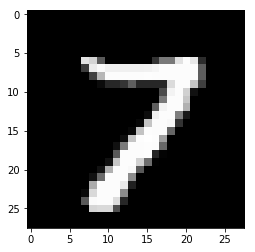

<type 'int'>
35


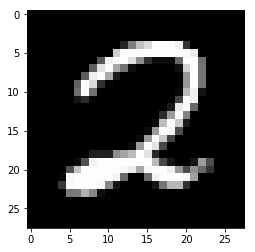

<type 'int'>
36


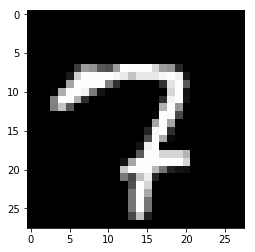

<type 'int'>
37


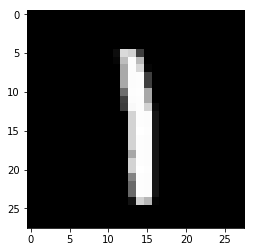

<type 'int'>
38


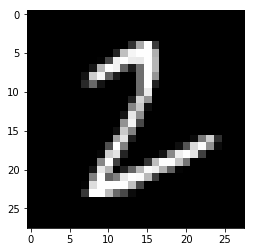

<type 'int'>
39


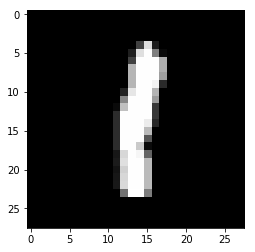

<type 'int'>
40


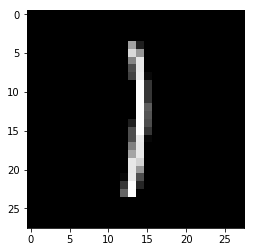

<type 'int'>
41


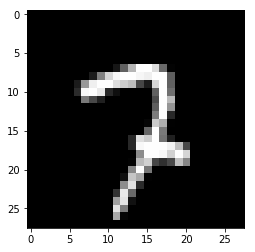

<type 'int'>
42


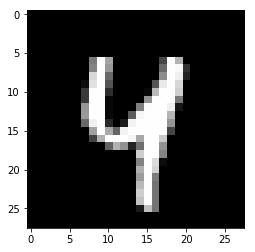

<type 'int'>
43


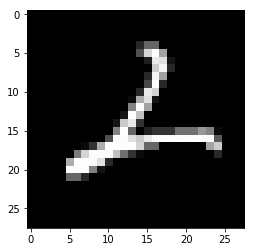

<type 'int'>
44


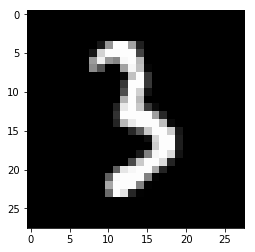

<type 'int'>
45


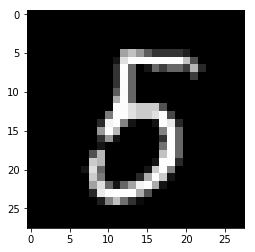

<type 'int'>
46


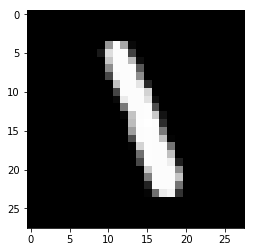

<type 'int'>
47


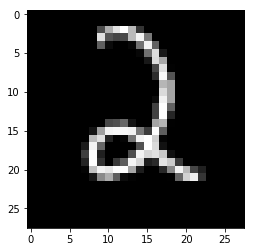

<type 'int'>
48


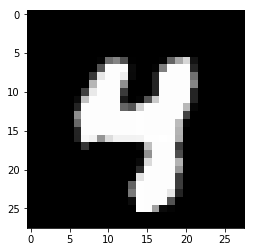

<type 'int'>
49


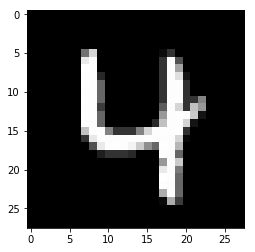

<type 'int'>
50


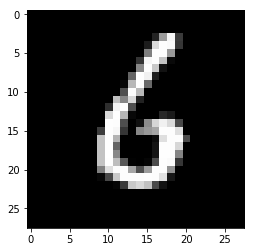

<type 'int'>
51


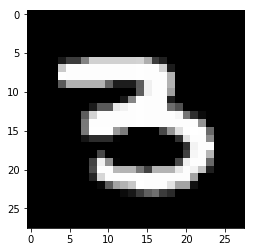

<type 'int'>
52


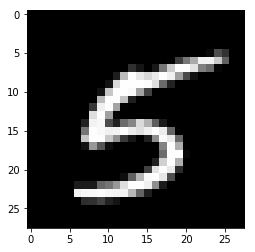

<type 'int'>
53


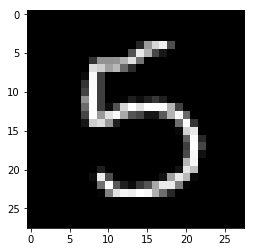

<type 'int'>
54


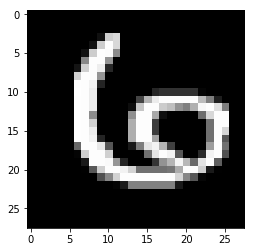

<type 'int'>
55


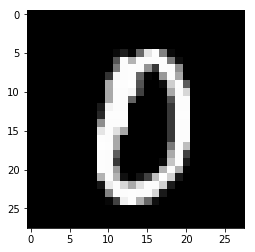

<type 'int'>
56


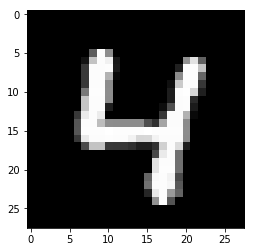

<type 'int'>
57


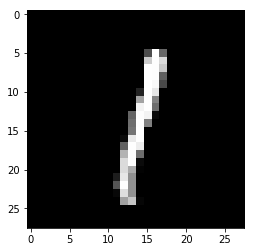

<type 'int'>
58


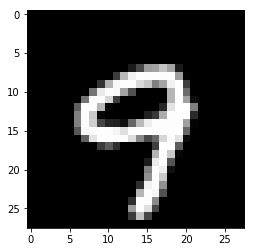

<type 'int'>
59


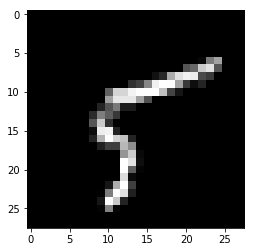

<type 'int'>
60


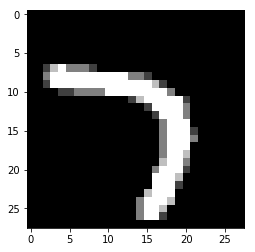

<type 'int'>
61


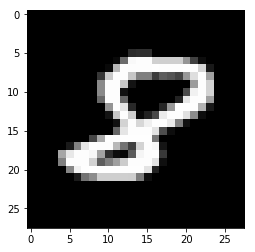

<type 'int'>
62


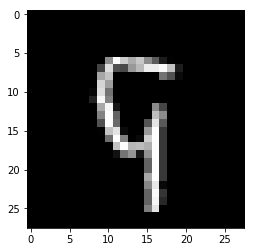

<type 'int'>
63


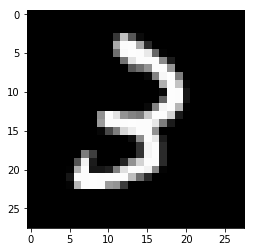

<type 'int'>
64


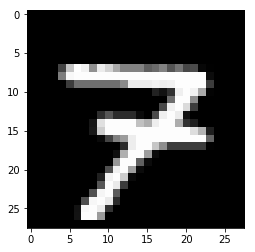

<type 'int'>
65


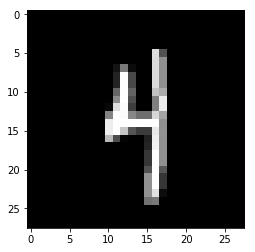

<type 'int'>
66


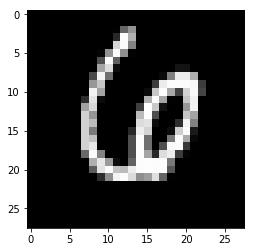

<type 'int'>
67


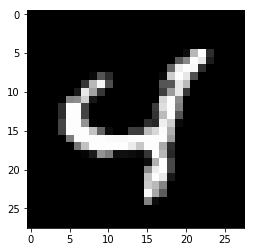

<type 'int'>
68


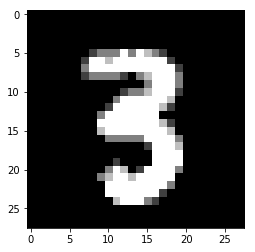

<type 'int'>
69


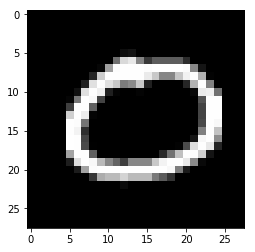

<type 'int'>
70


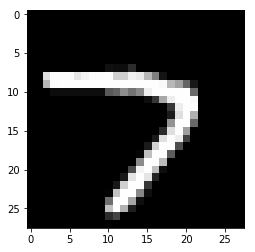

<type 'int'>
71


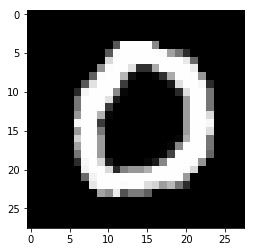

<type 'int'>
72


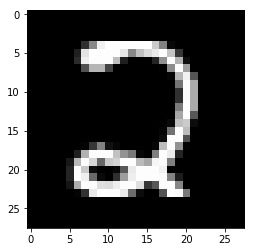

<type 'int'>
73


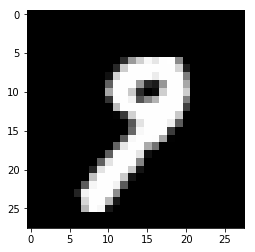

<type 'int'>
74


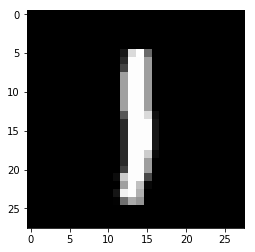

<type 'int'>
75


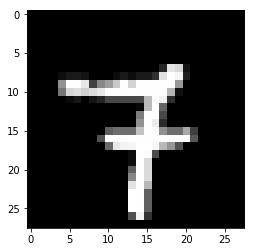

<type 'int'>
76


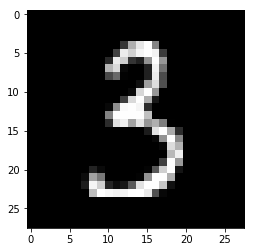

<type 'int'>
77


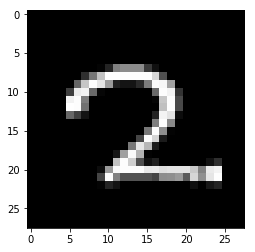

<type 'int'>
78


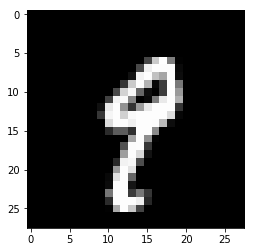

<type 'int'>
79


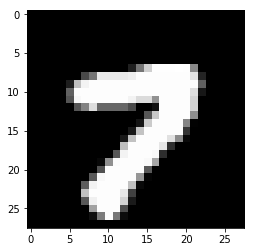

<type 'int'>
80


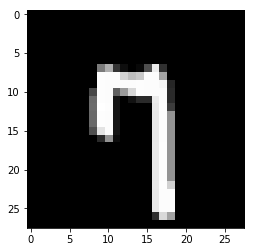

<type 'int'>
81


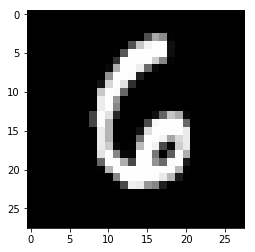

<type 'int'>
82


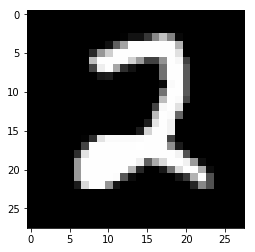

<type 'int'>
83


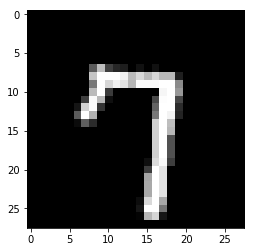

<type 'int'>
84


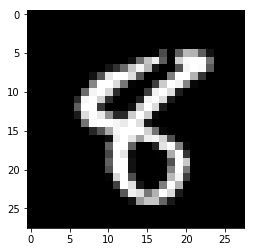

<type 'int'>
85


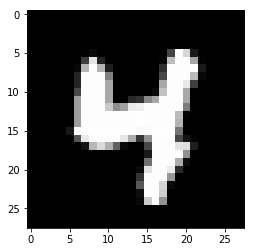

<type 'int'>
86


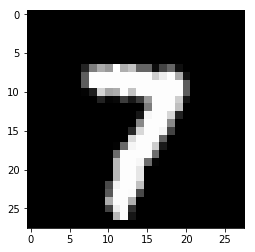

<type 'int'>
87


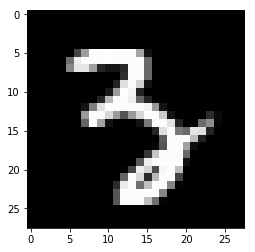

<type 'int'>
88


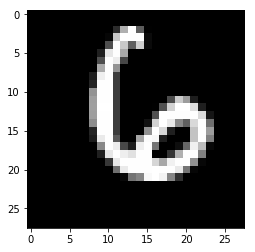

<type 'int'>
89


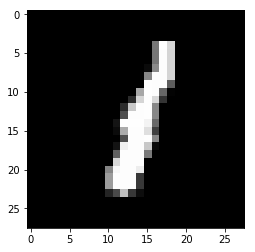

<type 'int'>
90


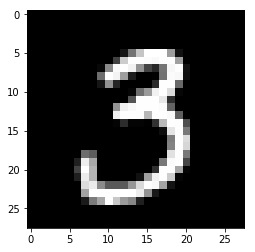

<type 'int'>
91


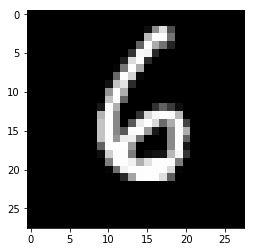

<type 'int'>
92


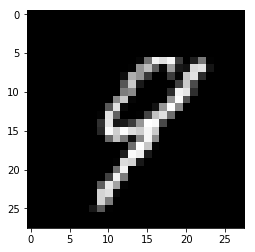

<type 'int'>
93


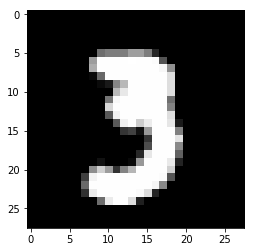

<type 'int'>
94


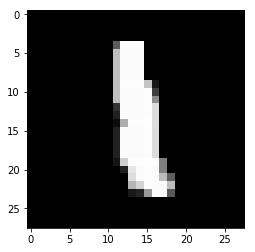

<type 'int'>
95


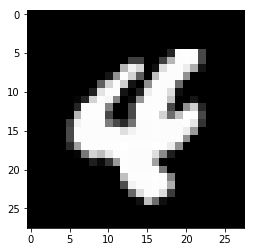

<type 'int'>
96


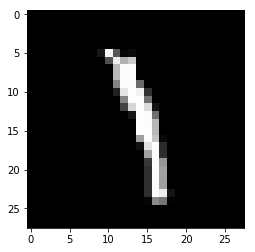

<type 'int'>
97


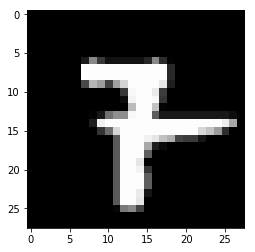

<type 'int'>
98


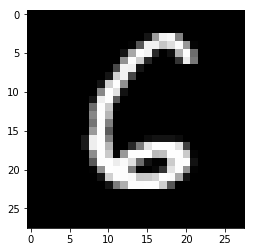

<type 'int'>
99


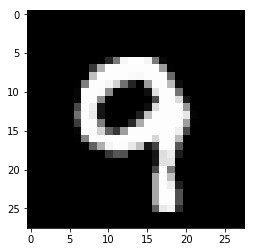

In [13]:
for i in range(100):
    print(type(i))
    print(i)
    first_image = mnist.test.images[i]
    first_image = np.array(first_image, dtype='float')
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()